<a href="https://colab.research.google.com/github/Miriam-1006/numpymat/blob/main/numpyprojedct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np

In [13]:
import sys
import datetime
import math
import matplotlib
import csv

In [80]:
total_count = 10**4
def inside_circle(total_count):
  x = np.random.uniform(size= total_count)
  y = np.random.uniform(size= total_count)
  radii = np.sqrt(x*x +y*y)
  count = len(radii[np.where(radii<=1.0)])
  return count

In [81]:
def main():
  import csv
  f = open('numpyfile.csv', 'w', newline='')
  writer = csv.writer(f)
  n_samples = int(total_count)
  start_time = datetime.datetime.now()
  for i in range(n_samples):
    counts = inside_circle(n_samples)
    my_pi = 4.0 * counts / n_samples
    relativeError = abs(abs(my_pi-math.pi)/math.pi)
    size_of_float = np.dtype(np.float64).itemsize
    end_time = datetime.datetime.now()
    elapsed_time = (end_time - start_time).total_seconds()
    memory_required = 3 * n_samples * size_of_float / (1024**3)
    row = [i, math.pi, my_pi, relativeError, memory_required, elapsed_time]
    writer.writerow(row)
    print("N: {}, Pi: {}, Estimated Pi: {}, Relative Error: {}, memory: {} GiB, time: {} s".format(i, math.pi, my_pi, relativeError, memory_required, elapsed_time))

if __name__ == '__main__':
  main()

Streaming output truncated to the last 5000 lines.
N: 5000, Pi: 3.141592653589793, Estimated Pi: 3.1624, Relative Error: 0.00662318406761962, memory: 0.00022351741790771484 GiB, time: 1.371362 s
N: 5001, Pi: 3.141592653589793, Estimated Pi: 3.1392, Relative Error: 0.0007616052918442174, memory: 0.00022351741790771484 GiB, time: 1.371594 s
N: 5002, Pi: 3.141592653589793, Estimated Pi: 3.1584, Relative Error: 0.005349944522884456, memory: 0.00022351741790771484 GiB, time: 1.371834 s
N: 5003, Pi: 3.141592653589793, Estimated Pi: 3.1448, Relative Error: 0.0010209300707849556, memory: 0.00022351741790771484 GiB, time: 1.372066 s
N: 5004, Pi: 3.141592653589793, Estimated Pi: 3.1296, Relative Error: 0.0038173801992086955, memory: 0.00022351741790771484 GiB, time: 1.372307 s
N: 5005, Pi: 3.141592653589793, Estimated Pi: 3.1388, Relative Error: 0.000888929246317861, memory: 0.00022351741790771484 GiB, time: 1.372539 s
N: 5006, Pi: 3.141592653589793, Estimated Pi: 3.1268, Relative Error: 0.00470

In [82]:
data = np.loadtxt(fname='numpyfile.csv', delimiter=',')
NVal = data[ : , 0]
ErrVal=data[ : , 3]
Mem=data[ : , 4]
Time=data[ : , 5]

here is N vs error

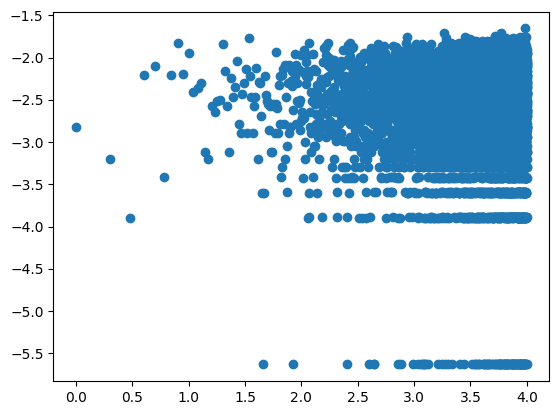

In [83]:
NVal = data[ : , 0]
logN = []
for n in range(1,len(NVal)):
  logN.append(math.log(NVal[n],10))
ErrVal=data[ : , 3]
logErr =[]
for err in range(1, len(ErrVal)):
  logErr.append(math.log(ErrVal[err],10))
matplotlib.pyplot.scatter(logN,logErr)

-0.010068240342859412 -2.5357411067273


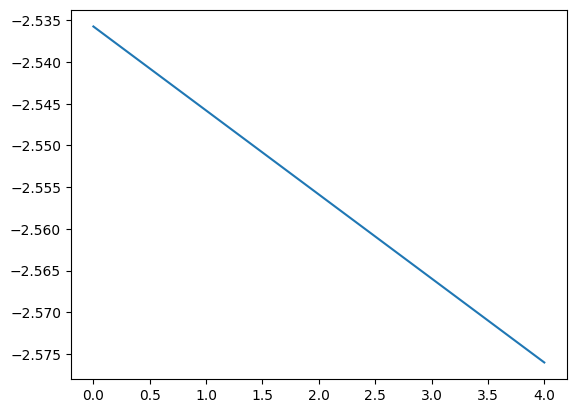

In [84]:
z = np.polyfit(logN, logErr, 1)
p = np.poly1d(z)
matplotlib.pyplot.plot(logN, p(logN))
print(z[0], z[1])

here is N vs memory

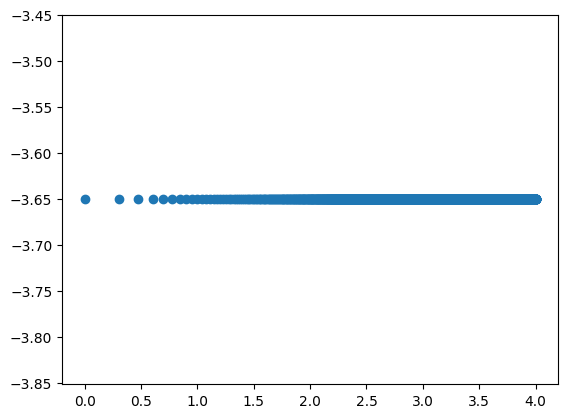

In [85]:
NVal = data[ : , 0]
logN = []
for n in range(1,len(NVal)):
  logN.append(math.log(NVal[n],10))
Mem=data[ : , 4]
logMem =[]
for err in range(1, len(Mem)):
  logMem.append(math.log(Mem[err],10))
matplotlib.pyplot.scatter(logN,logMem)

-6.679014962072563e-16 -3.6506886282078255


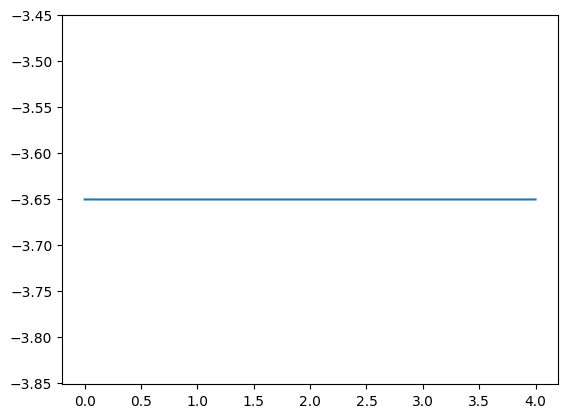

In [86]:
z = np.polyfit(logN, logMem, 1)
p = np.poly1d(z)
matplotlib.pyplot.plot(logN, p(logN))
print(z[0], z[1])

here is N vs time

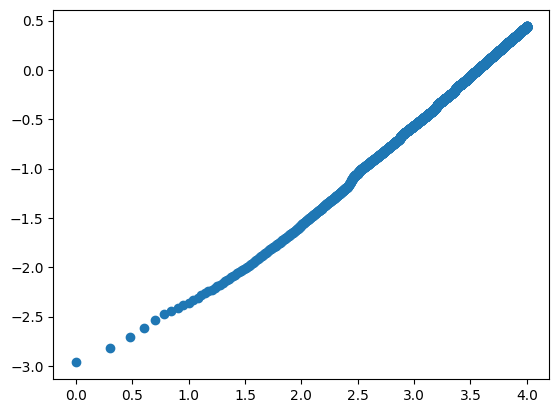

In [87]:
NVal = data[ : , 0]
logN = []
for n in range(1,len(NVal)):
  logN.append(math.log(NVal[n],10))
Time=data[ : , 5]
logTime =[]
for err in range(1, len(Time)):
  logTime.append(math.log(Time[err],10))
matplotlib.pyplot.scatter(logN,logTime)

0.9959440232551967 -3.546908493338005


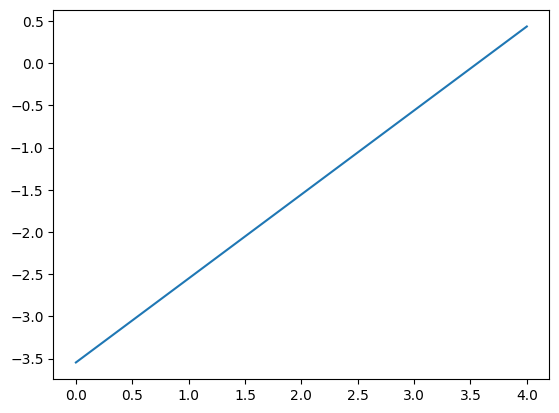

In [88]:
z = np.polyfit(logN, logTime, 1)
p = np.poly1d(z)
matplotlib.pyplot.plot(logN, p(logN))
print(z[0], z[1])

7a. As N increases, the relative error decreases.

7b. As N increases, the memory stays the same

7c. the log-log plot is linear. So, as N increases by 1, the time to calculate increases